# Simple Linear Regression - Salary Data #
Use the dataset ***SLR_salary.csv*** for this exercise.


## Import relevant packages and read the data ##

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import numpy as np

In [4]:
file = pd.read_csv("SLR_salary.csv")

salary_df = pd.DataFrame(file)

salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## Explore the data ##


In [6]:
# Check what the data types and columns are like
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
# See what the dataset is like in terms of mean, sd, percentiles

salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


From the output above, I can see that the salary data is a bit skewed, seems like from the median to the max, it's quite big in comparison to the min and median. Could be worth making a box plot and see this. Also let's make one for Years Experience too.

<Axes: >

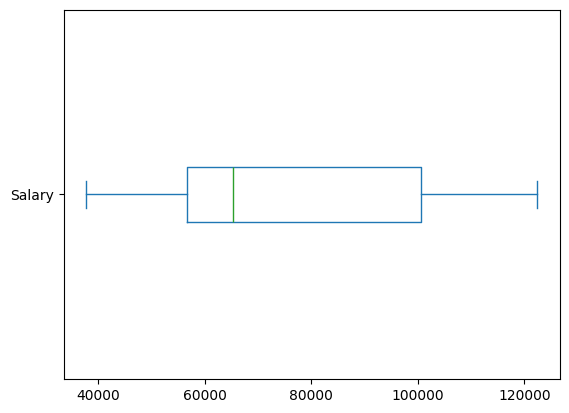

In [12]:
salary_df['Salary'].plot.box(vert = False)

This does shoe that that most of the salary is falling above the median and most of the data lies in the top half.

<Axes: >

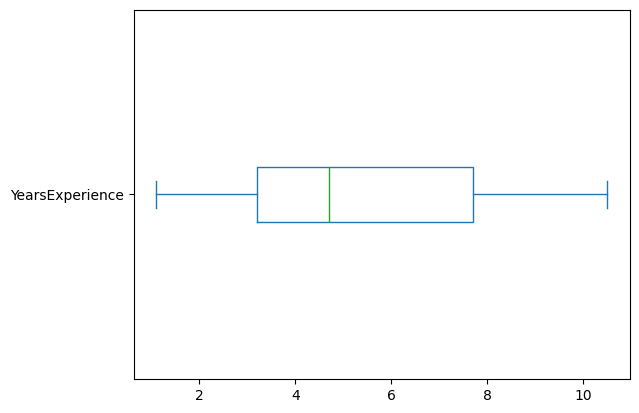

In [13]:
salary_df['YearsExperience'].plot.box(vert = False)

Similarly, the years of experience is also mostly skewed with more people with more than the median years of experience in this dataset

In [10]:
# Check if there are any null values

salary_df.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [11]:
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Seems like there is a strong correlation between years of experience and salary, will need to plot a scatter graph to see if this is the case as we know that correlation coefficient can be deceiving and inaccurate.

## Plot a Scatter graph ##

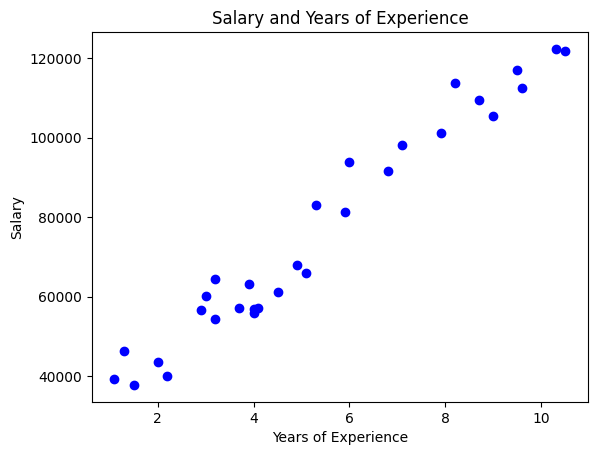

In [15]:
# Scatter plot using DataFrame's column values
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'], color='blue') 

# Set plot labels and title
plt.xlabel('Years of Experience') 
plt.ylabel('Salary')  
plt.title('Salary and Years of Experience') 

plt.show()

Base on this scatter plot and the strong positive correlation we found, we can see a strong relationship between Years of Experience and Salary, whereby we can start looking at a line of best fit to predict the model from this dataset.

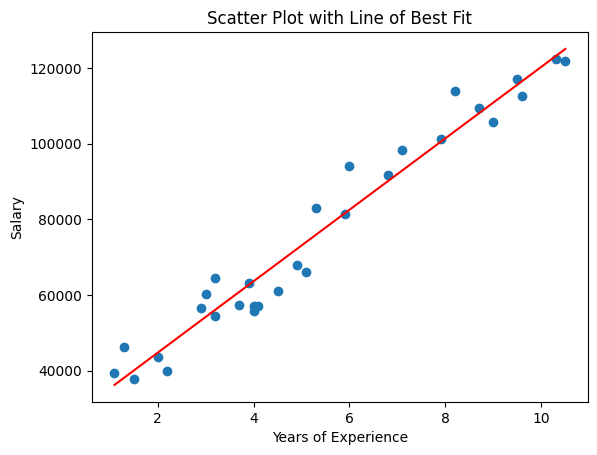

The equation of the line of best fit is y = 9449.9623x + 25792.2002


In [22]:
years = salary_df['YearsExperience']
salary = salary_df['Salary']

# Create a scatter plot of the data points
plt.scatter(years, salary)

# Compute the line of best fit
m, c = np.polyfit(years, salary, 1)

# Plot the line of best fit
plt.plot(years, (m * years) + c, color='red')

# Add labels and a title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot with Line of Best Fit')

# Show the plot
plt.show()

# Print the slope and y-intercept of the line of best fit
print(f"The equation of the line of best fit is y = {m:.4f}x + {c:.4f}")

We can see from the above there is a line of best fit for this dataset where we can use it to perform predictive analysis and predict what the salary could be base on years of experience, vice versa. However, the line of best fit is not perfect and there can be errors so it's important to built a model and check for measurement errors.

## Split the DataFrame into train and test data ##

In [23]:
train, test = train_test_split(
    salary_df,
    random_state = 13
)

In [36]:
train.shape

(22, 2)

In [39]:
train

,YearsExperience,Salary
17,5.3,83088
21,7.1,98273
0,1.1,39343
19,6.0,93940
4,2.2,39891
11,4.0,55794
9,3.7,57189
27,9.6,112635
13,4.1,57081
5,2.9,56642


In [34]:
test.shape

(8, 2)

In [40]:
test

,YearsExperience,Salary
22,7.9,101302
15,4.9,67938
26,9.5,116969
1,1.3,46205
25,9.0,105582
8,3.2,64445
7,3.2,54445
29,10.5,121872


Checking that both the train and test set are different rows and have different data inside


 ## Train the model



In [69]:
dependent_var = train['Salary']
independent_var = train['YearsExperience']
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

In [70]:
model

Wanted to check what's the object/data type of model

## Interpret the model results


In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     398.1
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.13e-14
Time:                        13:41:35   Log-Likelihood:                -221.31
No. Observations:                  22   AIC:                             446.6
Df Residuals:                      20   BIC:                             448.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.306e+04   2795.184      8.249      0.000    1.72e+04    2.89e+04
YearsExperience  9955.3660    498.963     19.952      0.000    8914.548     1.1e+04
==============================================================================
Omnibus:                        2.515   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.394
Skew:                           0.303   Prob(JB):                        0.498
Kurtosis:                       1.926   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### p-value

![p-value](assets/p-value.png)

Looking at the p-value here, it's less than 0.05 so that does suggest the data is statistically significant meaning our correlation is not just a coincidence. This does mean that the years of experience is having an effect on salary.

#### R-squared

![r-squared](assets/r-squared.png)

This is really high, being at 0.952 meaning that this is a pretty good fit. From the repo, in the real world 30% would be sufficient so this being at 95% means it's almost a near perfect fit. 

#### Adjusted R-squared

Also the value is really high (0.95) for this meaning that if there were more independent variables let's say job industry, title it would still be a good model to use for predicting the salary. 

#### F-Statistic

![f-statistic and prob f-statistic](assets/f-statistic.png)

The value is pretty high and it's over one so this does mean the new model is better than the old model. This shows the model we have is pretty reliable and can be used for predictive analysis.

#### Prob (F-Statistic)

So for prob (F-Statistic), the lower the probability, means the bigger the difference the new and old model are. So in this case, this means this regression model is a lot better statistically than the base one.

Given we have check all these measurements and they all show this model is promising, let's go ahead and predict the data using the test set.

## Predict data in the test set ##



In [62]:
# Make predictions on the salary 
predictions = model.predict(sm.add_constant(test['Salary']))
predictions

22    7.722642
15    4.531602
26    9.221084
1     2.452989
25    8.131995
8     4.197521
7     3.241089
29    9.690023
dtype: float64

## Is the model also 'a good fit' for our test data? ##


In [63]:
# Measure the test R squared on YearsExperience (the dependent variable of salary)

r2 = metrics.r2_score(test['YearsExperience'], predictions)
print("R-squared score:", r2)

R-squared score: 0.9525039889872098


The test R-Squared score here matches super close to the R-Squared score on the model R-Square score meaning that we can be confident if we were to use this to build a model for new dataset. We want roughly 10% + or - in the real world and this fits well within that parameter

## Rebuild the model for the whole data set ##

In [64]:
dependent_var = salary_df['Salary']
independent_var = salary_df['YearsExperience']
independent_var = sm.add_constant(independent_var)

# Build the model 
whole_model = sm.OLS(
    dependent_var,
    independent_var
).fit()

whole_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        13:29:41   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The stats in this summary here shows us again that the model is reliable, that it is fit for purpose and the numbers are what we should expect base on the stats we got before.

## Make a prediction ##

In [68]:
# make a prediction for salary with 5 years of experience
salary_pred = whole_model.predict([1, 5]) 
salary_pred[0]

73042.01180594407

![Line of best fit](assets/line_of_best_fit.png)

Using the line of best fit we got before, we can see that if we go along the x axis and go to 5 years of experience, we should expect a salary of 73042.01. So this means we have built built the model for the whole data set properly and that it is working as we expect it to.